# Reactive transport
In this tutorial we investigate the numerical solution of a chemical system with kinetics reactions.

## Exercise 1: chemical kinetics reactions

Let us consider the following set of reactions:
\begin{align*}
&A\rightarrow 2B+C\\
&2B+C\rightarrow A\\
&C\rightarrow D
\end{align*}
We can transform this system into a system of differential equations, by first setting  the concentration of the species as $c_0=[A]$, $c_1=[B]$, $c_2=[C]$, $c_3=[D]$. The system that describes their evolution thus given by
\begin{gather*}
    {d_t {c}} = S{r}({c})
\end{gather*}
where the stoichiometric matrix $S$ is the following
\begin{gather*}
    S =
    \begin{bmatrix}
        -1 & 1 & 0\\
        2 & -2 & 0\\
        1 & -1 & -1\\
        0 & 0 & 1
    \end{bmatrix}
\end{gather*}
and, for given $k_i$, the reaction terms $r_i$ in the previous system are given by
\begin{align*}
   &A\rightarrow 2B+C & \Rightarrow \quad & r_0({c}) = k_0 c_0\\
   &2B+C\rightarrow A & \Rightarrow \quad & r_1({c}) = k_1 c_1^2 c_2\\
   &C\rightarrow D & \Rightarrow \quad & r_2({c}) = k_2 c_2
\end{align*}
Thus the final system becomes
\begin{gather*}
    {d_t {c}} = S{r}({c})=
    \begin{bmatrix}
    -k_0 c_0 + k_1 c_1^2 c_2\\
    2 k_0 c_0 - 2 k_1 c_1^2 c_2\\
    k_0 c_0 - k_1 c_1^2 c_2 - k_2 c_2\\
    k_2 c_2
    \end{bmatrix}
\end{gather*}

Let us fist consider some standard packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We define now the kinetics coefficents and stoichiometric matrix of the reaction.

In [3]:
k0 = 2
k1 = 1
k2 = 0.5
# fmt: off
S = np.array([[-1,  1,  0],
              [ 2, -2,  0],
              [ 1, -1, -1],
              [ 0,  0,  1]])
# fmt: on

We can define the right hand side for the ODE system for $c_i$ as presented before.

In [4]:
# concentrations = [A,B,C,D]
def f(t, y):
    r0 = k0 * y[0]
    r1 = k1 * np.square(y[1]) * y[2]
    r2 = k2 * y[2]

    return S @ np.array([r0, r1, r2])

We define now a function that perform the time advancing scheme.

In [5]:
def explicit_euler(f, t_0, t_max, conc_0, delta_t):
    time = np.arange(t_0, t_max, delta_t)
    num_step = np.size(time)

    # initialization of the concentrations
    conc = np.zeros((np.size(conc_0), num_step))
    conc[:, 0] = conc_0

    # time loop
    for it in np.arange(1, num_step):
        # compute the total concentration
        conc[:, it] = conc[:, it - 1] + delta_t * f(time[it - 1], conc[:, it - 1])

    return time, conc

We define now the initial values $c^0$ and compute the concentrations for all the time steps, since the scheme is explicit we consider a small $\Delta t$.

In [6]:
t_0 = 0
t_max = 10
conc_0 = np.array([1, 0, 0, 0])
delta_t = 0.025

time, conc = explicit_euler(f, t_0, t_max, conc_0, delta_t)

Let us now define the concentration of each species as showon in the beginning.

In [7]:
A, B, C, D = conc

Finally, we plot the evolution of all the species in time.

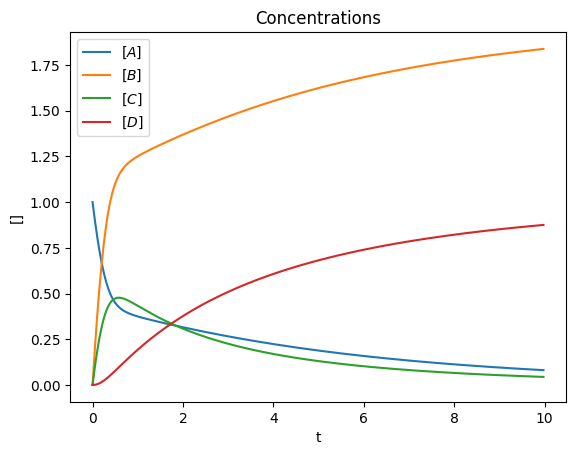

In [8]:
plt.plot(time, A)
plt.plot(time, B)
plt.plot(time, C)
plt.plot(time, D)
plt.xlabel("t")
plt.ylabel("[]")
plt.title("Concentrations")
plt.legend(["$[A]$", "$[B]$", "$[C]$", "$[D]$"])
plt.show()

In [11]:
# Consistency check
assert np.isclose(np.linalg.norm(A), 5.318162548634614)
assert np.isclose(np.linalg.norm(B), 31.501997441773774)
assert np.isclose(np.linalg.norm(C), 4.321668824518158)
assert np.isclose(np.linalg.norm(D), 12.972459923919423)